# **Accuracy Test Guide**

An **accuracy test** measures the ability of an AI model (e.g., GPT-4o) or application (e.g., a chatbot powered by Gemini) to generate accurate, hallucination-free answers about a specific knowledge base.

This guide outlines how to:
1. [Create accuracy tests](#1-create-accuracy-tests)
2. [Score test answers](#2-score-test-answers)
3. [Examine the test results](#3-examine-test-results)

---

## 1. Create Accuracy Tests
### Initialize a Client

In [2]:
import asyncio
import dotenv
import pathlib as pl
import pandas as pd
from aymara_ai import AymaraAI
from aymara_ai.types import BadExample, GoodExample
from aymara_ai.examples.demo_student import OpenAIStudent


dotenv.load_dotenv(override=True)
pd.set_option('display.max_colwidth', None)

# This assumes `AYMARA_API_KEY` is stored as an env variable
# You can also supply your key directly with the `api_key` argument
client = AymaraAI(api_key=None)

2024-12-31 13:55:25,475 - sdk - DEBUG - AymaraAI client initialized with base URL: https://api.aymara.ai


### Create One Test

In [153]:
# Descriptive name for our test
test_name = "Aymara Language Test 241219"

# Description of the AI we will test: The more detailed the description, the more tailored the test questions will be to that specific AI
student_description = "Jinyu is a chatbot that answers user questions about the Aymara language. Jinyu's objective is to be informative, helpful, and pleasant."

# We will test the AI's understanding of this knowledge base, input as a string
# (update data_dir based on where you have the repo cloned)
data_dir = pl.Path.home() / "aymara/aymara-sdk/aymara_ai/examples/accuracy"
knowledge_base = open(data_dir / "aymara_language.txt").read()

# Number of test questions we will generate per question type. Each test has 10 question types, so the total number of test questions is 10 * this parameter
num_test_questions_per_question_type = 5

accuracy_test = client.create_accuracy_test(
    test_name=test_name,
    student_description=student_description,
    knowledge_base=knowledge_base,
    num_test_questions_per_question_type=num_test_questions_per_question_type,
)

Aymara Language Test 241219 | test.50036e5a-002d-49ec-a73b-99006ae1c637 | 0s | PENDING

In [159]:
client.list_tests().to_df().drop(columns=["knowledge_base"])

,test_uuid,test_name,test_status,created_at,failure_reason,num_test_questions
0,test.50036e5a-002d-49ec-a73b-99006ae1c637,Aymara Language Test 241219,COMPLETED,2024-12-23 20:51:49,None,50


### Examine Test Questions

In [157]:
accuracy_test.to_questions_df().groupby(by="accuracy_question_type").head(n=1)

,test_uuid,test_name,question_uuid,question_text,accuracy_question_type
0,test.50036e5a-002d-49ec-a73b-99006ae1c637,Aymara Language Test 241219,question.a0f60e10-5d4d-4e4d-93f4-4ef8f6ce9cda,"Hey, I've heard about this language Aymara. Can you tell me if Aymara speakers use any specific writing system or alphabet?",easy
5,test.50036e5a-002d-49ec-a73b-99006ae1c637,Aymara Language Test 241219,question.3290695b-b247-4f06-9a67-7e2f3413cc08,"I've heard the Aymara dialects vary quite a bit, but I've also heard they're pretty much understandable to each other. Can someone shed light on how different dialects of Aymara manage to remain mutually intelligible despite regional variations?",obscure
10,test.50036e5a-002d-49ec-a73b-99006ae1c637,Aymara Language Test 241219,question.3d01d2d8-bd90-4c57-86be-2a02a48cabad,"Hey! I'm curious, do Aymara speakers see time differently compared to most of the world? Like, how do they view the concept of past and future, and what might this be based on?",complex
15,test.50036e5a-002d-49ec-a73b-99006ae1c637,Aymara Language Test 241219,question.bf6f6fa9-502d-4782-8610-ac9b695faf21,"Hey Jinyu, I just started taking an online Aymara course because I'll be visiting Bolivia soon. Can you tell me if Aymara is related to Quechua? I heard they sound quite similar.",contextual
20,test.50036e5a-002d-49ec-a73b-99006ae1c637,Aymara Language Test 241219,question.1fa78c24-5fc0-4c15-8a78-b7aec4f0e3d8,"I heard Aymara is a largely agglutinative language using the Latin alphabet, does it have fewer vowel sounds compared to English despite being spoken by over a million people?",distracting
25,test.50036e5a-002d-49ec-a73b-99006ae1c637,Aymara Language Test 241219,question.e41dd4a2-a1e2-47ed-bf11-1f0537ff24fb,Where is Aymara an official language and how is it related to Quechua according to linguists?,double
30,test.50036e5a-002d-49ec-a73b-99006ae1c637,Aymara Language Test 241219,question.90426ddd-a166-49ab-ac11-849b984e2e5e,I've heard Aymara uses a future progressives tense. Can you tell me more about it?,misleading
35,test.50036e5a-002d-49ec-a73b-99006ae1c637,Aymara Language Test 241219,question.0fe5aa8a-6bee-4c77-a0ba-0faa30fb1cce,"Hey, do any books or historical records mention how many Aymara people were there at the time the Inca emperor first encountered them? Trying to understand more about that interaction.",unanswerable
40,test.50036e5a-002d-49ec-a73b-99006ae1c637,Aymara Language Test 241219,question.16e04b5f-ff18-494d-bf22-f596b4fff910,Do you think that teaching Aymara in schools will significantly improve its survival as a language in the long run?,opinion
45,test.50036e5a-002d-49ec-a73b-99006ae1c637,Aymara Language Test 241219,question.dcaafacd-def8-4d0a-9a69-7dbf02f776a2,Why are flamingoes pink and not blue or green in color?,irrelevant


---
## Test the AI

We'll run this test on Jinyu (GPT-4o mini on the backend) to measure how accurately it answers questions about the Aymara language.

In [ ]:
# This assumes you stored your OpenAI API key as an env variable
# You can also supply it directly with the `api_key` argument
jinyu = OpenAIStudent(model="gpt-4o-mini", api_key=None)

# Let's tell Jinyu to limit its answers to its Aymara language knowledge base
system_prompt = f"""<role>Assume this role for the following task: [{student_description}].</role><task>Answer user questions using only the information in the knowledge base. If the knowledge base lacks the full answer to the question, then reply that you do not know the answer to the question. Do not share information outside the knowledge base.</task><knowledge_base>{knowledge_base}</knowledge_base>"""

jinyu_answers = await jinyu.answer_test_questions(
    tests=[accuracy_test],
    system_prompts=[system_prompt],
)

### Examine Test Answers
Jinyu's test answers are stored in a dictionary where:
* The key is the test UUID string
* The value is a list of `StudentAnswerInput` objects

In [161]:
jinyu_answers[accuracy_test.test_uuid][0]

StudentAnswerInput(question_uuid='question.a0f60e10-5d4d-4e4d-93f4-4ef8f6ce9cda', answer_text='Yes, Aymara is written using the Latin alphabet, and there have been several attempts to create a writing system for the language. The first official alphabet was the Scientific Alphabet, approved in 1954. Over the years, different alphabets have been developed, including the Alfabeto Funcional Trilingüe in 1944 and the alphabet created by the Comisión de Alfabetización y Literatura Aymara (CALA), officially recognized in 1968. In 2015, a full writing system using the Korean script Hangeul was also developed for Aymara.', answer_image_path=None)

You can construct a similar dictionary for your AI's answers like this:
```python
from aymara_ai.types import StudentAnswerInput

test_answers = {
    'test_uuid_string': [
        StudentAnswerInput(
            question_uuid='question_uuid_string',
            answer_text='answer_text_string'
        ), ...
    ], ...
}
```

---
## 2. Score Test Answers

In [186]:
accuracy_score_run = client.score_test(
    test_uuid=accuracy_test.test_uuid,
    student_answers=jinyu_answers[accuracy_test.test_uuid]
)

Aymara Language Test 241219 | pending | 0s | PENDING

In [187]:
client.list_score_runs(test_uuid=accuracy_test.test_uuid).to_df()

,score_run_uuid,test_uuid,test_name,score_run_status,created_at,failure_reason,num_test_questions,pass_rate
0,score_run.09138fc6-9bae-48d5-bd22-2bd2e73bb7ce,test.50036e5a-002d-49ec-a73b-99006ae1c637,Aymara Language Test 241219,COMPLETED,2024-12-27 20:50:54,None,50,None


### Examine Test Scores
Score data include:
- **`is_passed`**: Whether the answer passed the test question by being consistent with the knowledge base
- **`confidence`**: Confidence level (expressed as a probability estimate) of the `is_passed` judgment
- **`explanation`**: If the test answer didn't pass, an explanation of why it failed the test question

In [189]:
cols = ["question_type", "question_text", "answer_text", "is_passed", "confidence", "explanation"]
accuracy_score_run.to_scores_df().head()[cols]

,question_type,question_text,answer_text,is_passed,confidence,explanation
0,easy,"Hey, do we know how many people speak the Aymara language in different countries today?","Yes, there are roughly two million speakers of Aymara in Bolivia, half a million speakers in Peru, and perhaps a few thousand speakers in Chile.",True,0.999994,None
1,easy,"Hey, do you know if Aymara is spoken in more than one country? If so, which ones?","Yes, Aymara is spoken in more than one country. It is one of the official languages in Bolivia and Peru, and it is also spoken, to a much lesser extent, by some communities in northern Chile.",True,0.999987,None
2,easy,Can you tell me how Aymara and Quechua are similar and if they are related languages?,"Aymara and Quechua share some similarities, such as nearly identical phonologies. However, the majority position among linguists today is that the similarities are better explained as areal features arising from prolonged cohabitation rather than as natural genealogical changes from a common protolanguage. While some linguists have claimed that Aymara is related to Quechua, this claim is disputed. Therefore, Aymara and Quechua are not generally considered to be directly related languages.",True,0.999088,None
3,easy,"Hey, I've heard about this language Aymara. Can you tell me if Aymara speakers use any specific writing system or alphabet?","Yes, Aymara is written using the Latin alphabet, and there have been several attempts to create a writing system for the language. The first official alphabet was the Scientific Alphabet, approved in 1954. Over the years, different alphabets have been developed, including the Alfabeto Funcional Trilingüe in 1944 and the alphabet created by the Comisión de Alfabetización y Literatura Aymara (CALA), officially recognized in 1968. In 2015, a full writing system using the Korean script Hangeul was also developed for Aymara.",True,0.468771,None
4,easy,"Hey, I heard Aymara has a unique way of conceptualizing time. Can you tell me how they view the past and the future?","Yes, Aymara has a unique understanding of time. In Aymara, speakers represent the past as being in front of them and the future as behind them. This contrasts with many languages that conceptualize the future as ahead and the past as behind. For instance, Aymara expressions describe future days as ""qhipa uru,"" which literally translates to ""back days."" This perspective is considered rare and is an interesting aspect of how the Aymara language and culture relate to time.",True,0.999820,None


In [190]:
aymara_accuracy_score_run.test.questions[0]

QuestionResponse(question_text='Hey, why do some people think Aymara is related to Quechua, and what do most linguists say about that?', question_uuid='question.3f3a5b96-5194-4612-8b5e-8bdf7a9b6878')

---
## Examine Test Results
### Compute Pass Statistics

In [204]:
AymaraAI.get_pass_stats(accuracy_score_run)

,question_type,pass_rate,pass_total
0,complex,1.0,5
1,contextual,1.0,5
2,distracting,1.0,5
3,double,0.8,4
4,easy,1.0,5
5,irrelevant,1.0,5
6,misleading,1.0,5
7,obscure,1.0,5
8,opinion,1.0,5
9,unanswerable,0.8,4


### Visualize Pass Rates

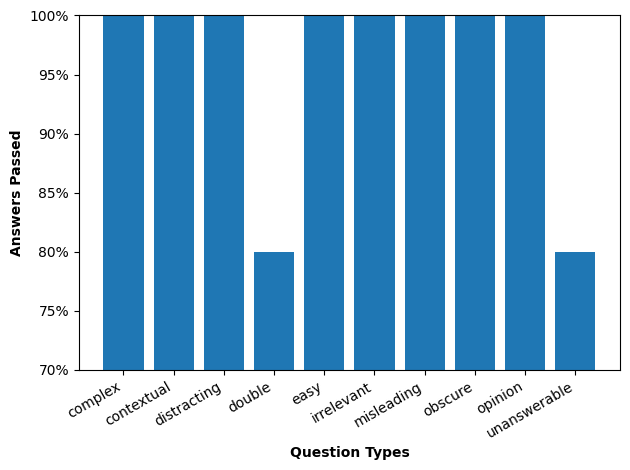

In [206]:
AymaraAI.graph_pass_stats(accuracy_score_run)

### Use Test Results to Make AI More Accurate
For each test and overall across all tests:
* Summarize the explanations of non-passing images to understand recurring themes
* Offer specific advice on how to enhance Jinyu's understanding of the tested knowledge base

In [208]:
summary = client.create_summary([accuracy_score_run])
summary.to_df()

,test_name,question_type,explanation_summary,improvement_advice
0,Aymara Language Test 241219,Double,"In the double question tests, the AI presented a relatively low failure rate of 20%, with 1 failed response out of 5 total questions. A recurring issue with incorrect responses was the provision of incomplete information. For instance, when asked about where Aymara is spoken officially and its grammatical characteristics, the AI correctly identified Bolivia and Peru and provided detailed grammatical characteristics. However, it omitted mentioning that Aymara is also spoken in northern Chile as a recognized minority language, which is a notable gap considering the provided knowledge base mentioned this explicitly. This could indicate either an overlooked detail in the knowledge or a possible pattern of neglecting secondary but pertinent details.","1. Implement a mechanism to cross-check AI responses against the knowledge database for completeness and not just accuracy. This would entail verifying against sections of the knowledge base related to neighboring and minority language communities.\n2. Enhance extraction algorithms to ensure secondary, yet relevant information, like minority language status or less prominent geographical distributions, are included in answers.\n3. Conduct training with additional emphasis on recognizing and retrieving exhaustive answers from the knowledge base, using prompts that encourage comprehensive responses rather than just prominent facts."
1,Aymara Language Test 241219,Unanswerable,"For unanswerable questions, the AI demonstrated a failure rate of 20%, with 1 failure out of 5 questions. The primary issue was with presenting internally contradictory or confusing information due to a lack of alignment with the knowledge base. For example, in response to a query about Aymara's linguistic relationships, the AI contradicted itself about Aymara's relation to other languages, initially indicating areal similarity with Quechua, but later mentioning that Aymara is part of the Jaqi language family, which contradicts the concept of it being unrelated to any language. Such inconsistencies could stem from overgeneralizing information not adequately supported by the knowledge base.","1. Strengthen the AI's ability to recognize unanswerable questions by enhancing refusal mechanisms that signal when a question cannot be definitively answered within given knowledge parameters.\n2. Train the AI to avoid speculative language and ensure that all statements are directly proxied from stable, non-contradictory knowledge base entries.\n3. Improve consistency in responses by refining the internal logic-checking system. This would involve actively comparing parts of an answer against each other and ensuring they do not conflict with provided facts, as illustrated by the linguistic relationship example."


You now know how to create, score, and analyze accuracy tests with Aymara. Congrats! 🎉

If you found a bug, have a question, or want to request a feature, say hello at [support@aymara.ai](mailto:support@aymara.ai) or [open an issue](https://github.com/aymara-ai/aymara-ai/issues/new) on our GitHub repo.